<a href="https://colab.research.google.com/github/T33mac/colab-projects/blob/master/Engineering_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

# 1. Load Dataset

In [2]:
from sklearn.datasets import load_diabetes

#All 10 variables have been mean centered and scaled and by the standard deviation times
db = load_diabetes()

df = pd.DataFrame(db.data)
df.columns = db.feature_names
df['target'] = db.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [10]:
df['age'][3] = np.nan
df.head()  #Setting index [3] as null in df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,NaN,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
df.isnull().mean()

age       0.002262
sex       0.000000
bmi       0.000000
bp        0.000000
s1        0.000000
s2        0.000000
s3        0.000000
s4        0.000000
s5        0.000000
s6        0.000000
target    0.000000
dtype: float64

# 2. Imputation

In [7]:
df.columns[df.isnull().mean() > 0]

Index(['age'], dtype='object')

In [8]:
threshold = 0.001

#Dropping columns with missing value rate higher than threshold
data = df[df.columns[df.isnull().mean() < threshold]]

data.head() #Age column will disappear

,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [11]:
#Dropping rows with missing values
data = df.loc[df.isnull().mean(axis=1) < threshold]

data.head() # index 3 will be gone

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0


In [12]:
#Filling missing values with 0
data = df.fillna(0)

data.head() # index 3 will be set to 0

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,0.000000,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [13]:
#Filling missing values with medians of the columns
data = df.fillna(df.median())
data.head() # index 3 will be median age

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,0.005383,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [15]:
from sklearn.impute import SimpleImputer

i_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
i_mean.fit(df)

print(f'Mean {df["age"].mean()}')

imputed = pd.DataFrame(i_mean.transform(df))
imputed.head() #index 3 will be mean age

Mean 0.00020195677857619027


,0,1,2,3,4,5,6,7,8,9,10
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,0.000202,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# 3. Outliers

In [16]:
#Standard deviation policy
upper = df['age'].mean() + 3 * df['age'].std()
lower = df['age'].mean() - 3 * df['age'].std()

data = df[(df['age'] < upper) & (df['age'] > lower)]

data.head() # index 3 will be gone

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0


In [19]:
#Percentile deviation policy
upper = df['age'].quantile(.75)
lower = df['age'].quantile(.25)

IQR = upper - lower

data = df[(df['age'] < upper + 1.5 * IQR) &
          (df['age'] > lower - 1.5 * IQR)]
data.head() # index 3 will be gone

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0


# 4. Binning

In [23]:
#helps prevent overfitting, but sacrifices performance
#use with caution

df['binned_age'] = pd.cut(df['age'],
                          bins=[0, 0.01, 0.02, 0.05, 0.09],
                          labels=['low','mid-low','mid-high', 'high'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,binned_age
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,mid-high
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,NaN
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,high
3,NaN,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,NaN
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,low


# 5. Log Transform

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0a9d23b38>]],
      dtype=object)

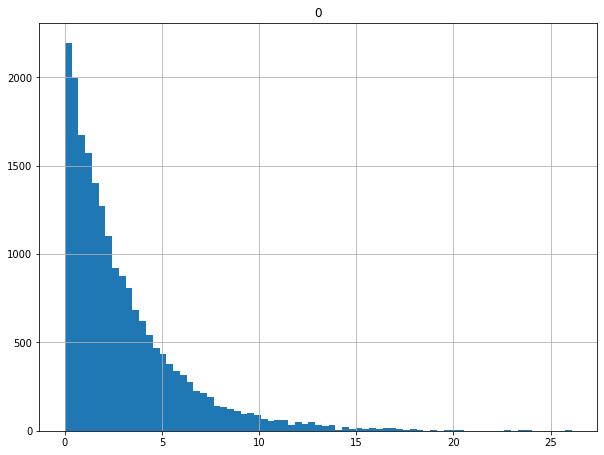

In [26]:
#Helps handle skewed data
#Original data to apply log transform must only have POSITIVE VALUES

sk_df = pd.DataFrame(np.random.exponential(scale=3, size=20000))
sk_df.hist(figsize=(10, 7.5), bins=75)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0a9c43828>]],
      dtype=object)

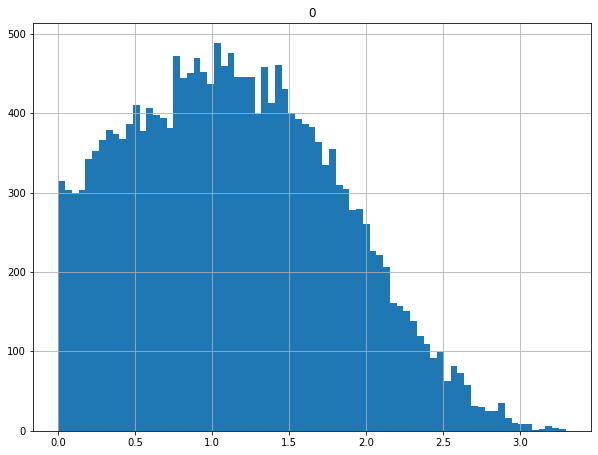

In [27]:
lg_df = (sk_df + 1).transform(np.log)
lg_df.hist(figsize=(10, 7.5), bins=75)

# 6. One Hot Encoding

In [30]:
data = pd.DataFrame({'Team':['Eagles','Bears','Raptors','Hornets','Bees','Lions'],
                     'City':['Rome','Helsinki','Hong Kong','Hong Kong','Rome','Rome'],
                     'Games':[12,15,23,18,21,8],
                     'MVP_Player':['John Stewart','Leo Davinci','Mike Donatello','Raphael Dolce','Bruce Lee','Mahatma Gandhi']})
data

,Team,City,Games,MVP_Player
0,Eagles,Rome,12,John Stewart
1,Bears,Helsinki,15,Leo Davinci
2,Raptors,Hong Kong,23,Mike Donatello
3,Hornets,Hong Kong,18,Raphael Dolce
4,Bees,Rome,21,Bruce Lee
5,Lions,Rome,8,Mahatma Gandhi


In [29]:
one_hot_encoding = pd.get_dummies(data['City'])
one_hot_encoding

,Helsinki,Hong Kong,Rome
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1
5,0,0,1


# 7. Group Operations

In [31]:
data.groupby('City')['Games'].sum()

City
Helsinki     15
Hong Kong    41
Rome         41
Name: Games, dtype: int64

In [32]:
data.groupby('City')['Team'].count()

City
Helsinki     1
Hong Kong    2
Rome         3
Name: Team, dtype: int64

In [33]:
import seaborn as sns

flights = sns.load_dataset('flights')
flights.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [34]:
flights = flights.pivot('month','year','passengers')  #(rows, columns, data/content)
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


# 8. Feature Split

In [35]:
data['MVP_Player'].str.split(' ').map(lambda x: x[0])

0       John
1        Leo
2       Mike
3    Raphael
4      Bruce
5    Mahatma
Name: MVP_Player, dtype: object

# 9. Scaling

In [36]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

data = [[-1,2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit(data)

scaler.transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [37]:
# Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)

scaler.transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [39]:
from datetime import date

data = pd.DataFrame({'date':['14-08-1983', '23-05-2015']})

data.head()

,date
0,14-08-1983
1,23-05-2015


In [41]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')
data.head()

,date
0,1983-08-14
1,2015-05-23


In [42]:
data['date'].dt.year

0    1983
1    2015
Name: date, dtype: int64

In [44]:
print(f"Years \n {data['date'].dt.year}, Months \n {data['date'].dt.month}, Days \n {data['date'].dt.day}")

Years 
 0    1983
1    2015
Name: date, dtype: int64, Months 
 0    8
1    5
Name: date, dtype: int64, Days 
 0    14
1    23
Name: date, dtype: int64


In [45]:
data.date.dt.day_name()

0      Sunday
1    Saturday
Name: date, dtype: object